<a href="https://colab.research.google.com/github/ssuxmin/tmp/blob/main/%5BBaseline%5D_DecisionTree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [ ]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# 시드(seed) 고정  
매번 고정된 결과를 얻기 위해서 사용합니다.  
시드를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나올 수 있습니다.

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

# 데이터 읽어오기 및 데이터 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/범죄유형/

/content/drive/MyDrive/Colab Notebooks/범죄유형


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/범죄유형/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/범죄유형/test.csv')

In [ ]:
print(train)

                ID   월   요일  시간  소관경찰서  소관지역    사건발생거리     강수량(mm)  강설량(mm)  \
0      TRAIN_00000   9  화요일  10    137   8.0  2.611124    0.000000      0.0   
1      TRAIN_00001  11  화요일   6    438  13.0  3.209093    0.000000      0.0   
2      TRAIN_00002   8  일요일   6   1729  47.0  1.619597    0.000000      0.0   
3      TRAIN_00003   5  월요일   6   2337  53.0  1.921615   11.375000      0.0   
4      TRAIN_00004   9  일요일  11   1439  41.0  1.789721    0.000000      0.0   
...            ...  ..  ...  ..    ...   ...       ...         ...      ...   
84401  TRAIN_84401   4  일요일   7    336  11.0  3.808190   99.111111      0.0   
84402  TRAIN_84402   8  목요일  12   2149  38.0  1.458490    0.000000      0.0   
84403  TRAIN_84403   7  일요일   6     29  46.0  2.944913  105.888889      0.0   
84404  TRAIN_84404   1  화요일  11    536  25.0  0.493679    2.285714      8.6   
84405  TRAIN_84405   7  수요일  11    448  13.0  4.280380    0.000000      0.0   

       적설량(cm)     풍향   안개  짙은안개   번개  진눈깨비   서리  연

In [ ]:
print(test)

               ID   월   요일  시간  소관경찰서  소관지역    사건발생거리     강수량(mm)  강설량(mm)  \
0      TEST_00000   9  금요일   5    927  28.0  1.570654   19.625000      0.0   
1      TEST_00001   5  수요일   3    926  28.0  1.712457   21.444444      0.0   
2      TEST_00002   5  월요일   6   1437  33.0  0.447496   25.200000      0.0   
3      TEST_00003  11  화요일   1   1739  31.0  0.878585    0.000000      0.0   
4      TEST_00004  10  목요일  10    830  15.0  0.496423   26.142857      0.0   
...           ...  ..  ...  ..    ...   ...       ...         ...      ...   
17284  TEST_17284  11  금요일   9   1138  31.0  2.500387    0.000000      0.0   
17285  TEST_17285   3  월요일   1    148   9.0  2.234593    0.000000      0.0   
17286  TEST_17286  10  금요일   9   2347  53.0  0.360005    6.857143      0.0   
17287  TEST_17287   9  목요일   4    548  13.0  3.993724    0.000000      0.0   
17288  TEST_17288   8  수요일   9     28  46.0  2.183220  135.500000      0.0   

       적설량(cm)     풍향   안개  짙은안개   번개  진눈깨비   서리  연기/연무  눈날림 범죄

In [ ]:
# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [ ]:
train.info()  
# train 데이터는 총 84406개 행(row)이 존재합니다.
# 결측치는 존재하지 않으며 요일, 범죄발생지 피처의 데이터타입이 object임을 알 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [ ]:
# 기술통계량을 확인하기위해 describe() 함수를 사용합니다.  
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
# 요일의 등장 빈도를 확인하는 코드입니다.  
train['요일'].value_counts()

토요일    13317
일요일    12837
금요일    12243
월요일    11702
화요일    11566
수요일    11410
목요일    11331
Name: 요일, dtype: int64

In [ ]:
# 범죄발생지의 등장 빈도를 확인하는 코드입니다.  
train['범죄발생지'].value_counts()

주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국         653
호텔/모텔      591
병원         453
은행         132
Name: 범죄발생지, dtype: int64

In [ ]:
print(sorted(train['범죄발생지'].unique()))
print(sorted(test['범죄발생지'].unique()))

['공원', '백화점', '병원', '식당', '약국', '은행', '인도', '주거지', '주유소', '주차장', '차도', '편의점', '학교', '호텔/모텔']
['공원', '백화점', '병원', '식당', '약국', '은행', '인도', '주거지', '주유소', '주차장', '차도', '편의점', '학교', '호텔/모텔']


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')

fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

import warnings
warnings.filterwarnings('ignore')

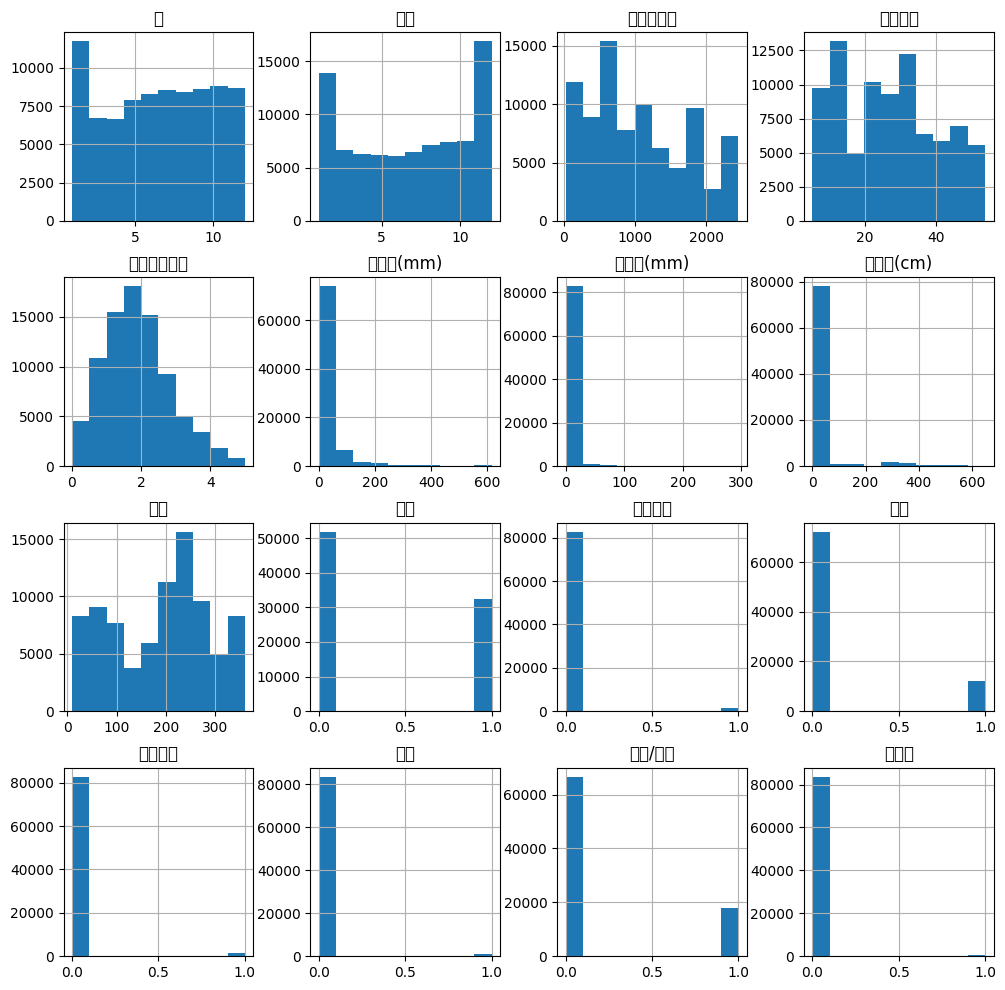

In [ ]:
except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

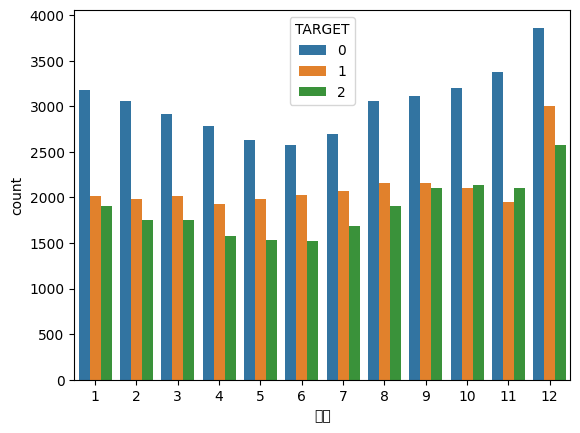

In [ ]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

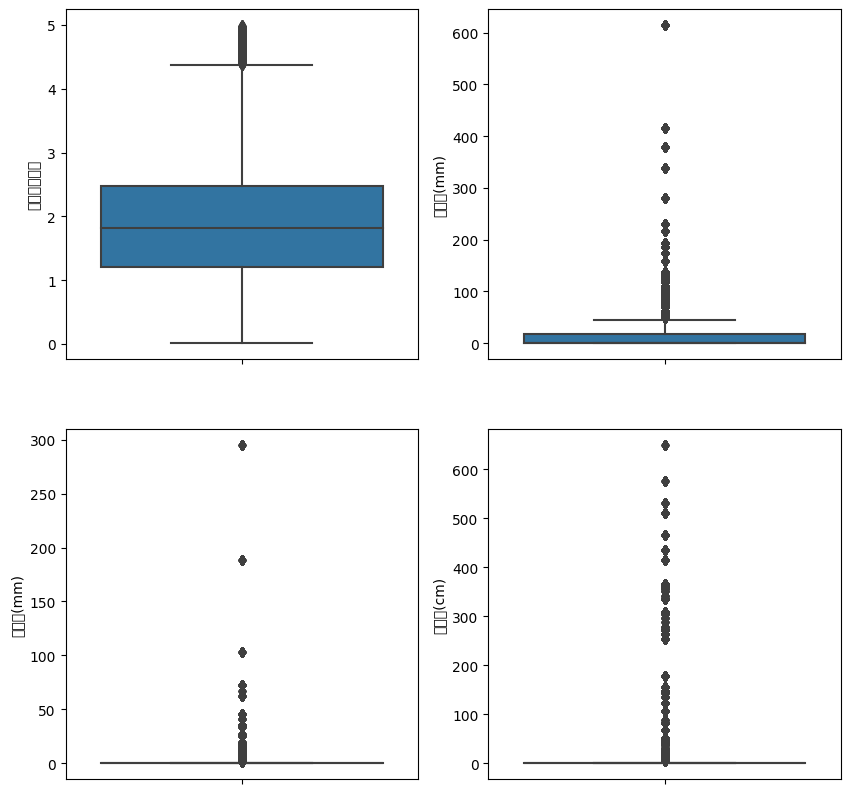

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

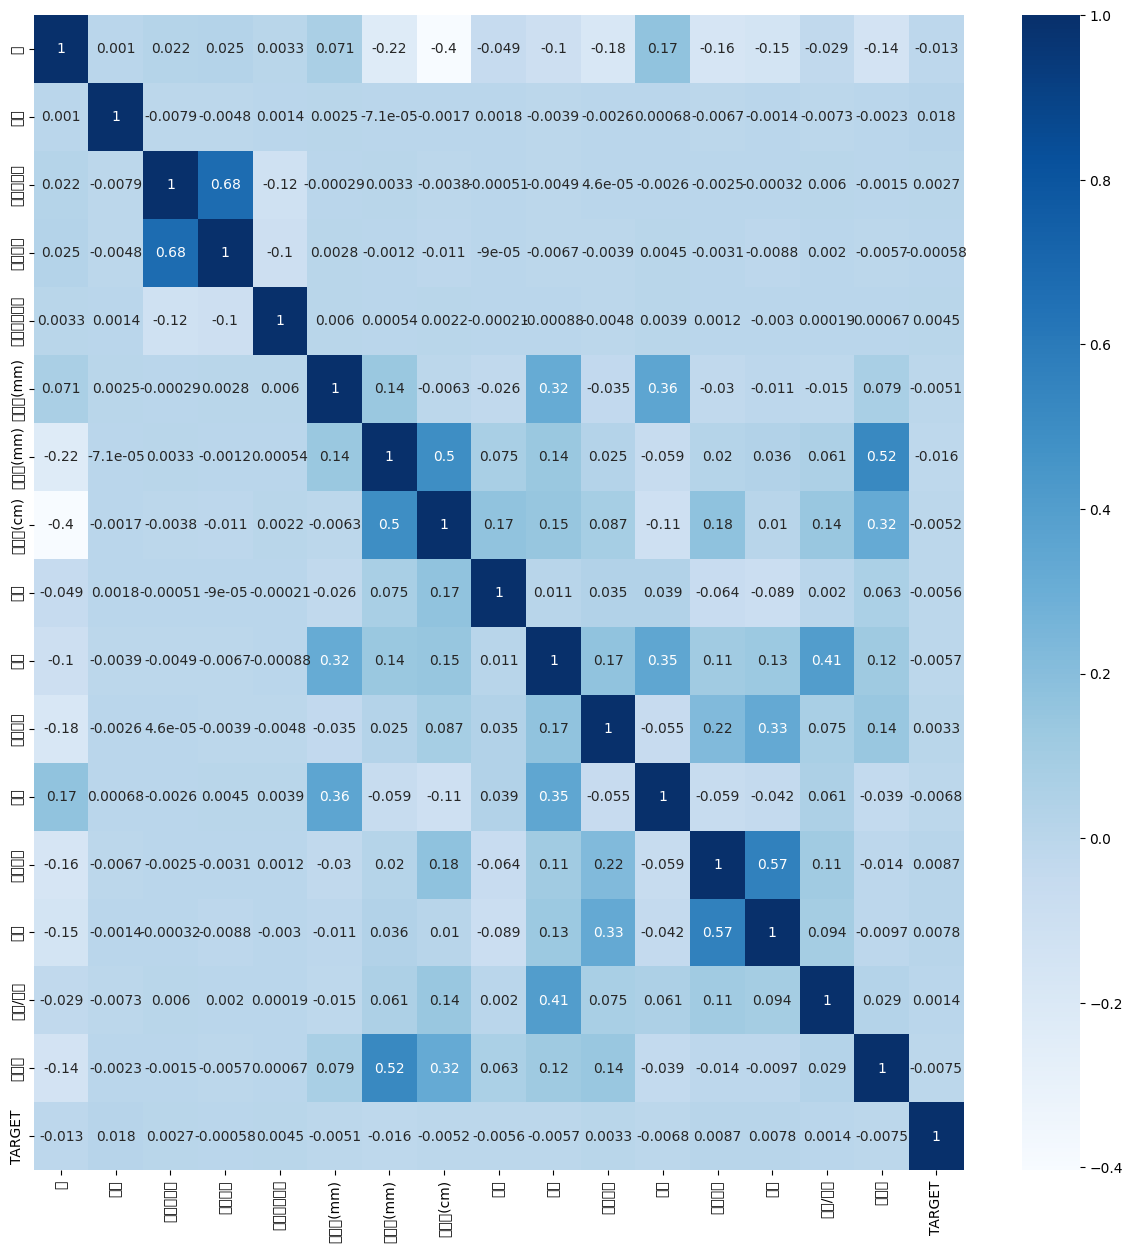

In [ ]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

# 독립변수(x_train), 종속변수(y_train)로 분리하기  

우리는 독립변수를 사용하여 종속변수를 예측하여야 합니다.  
우리가 예측해야하는 종속변수는 'TARGET' 컬럼입니다.  
따라서 종속변수를 y_train 변수에 할당하고 독립변수는 x_train 변수에 할당합니다.  

ID는 모델이 종속변수를 예측할 때 도움이 되지 않으므로 해당 컬럼을 제거합니다.  

In [ ]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']

x_test = test.drop('ID', axis = 1)

# 라벨인코딩(Label Encoding) 
라벨인코딩은 범주형(categorical) 변수를 수치형(numerical) 변수로 변환합니다.    
대부분의 머신러닝 알고리즘은 수치형 데이터를 입력으로 받기 때문에,   
범주형 데이터를 수치형 데이터로 변환하여 모델에 입력할 필요가 있습니다.   

In [ ]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

# 모델 정의

In [ ]:
# 모델 인자에 random_state를 넣음으로써 시드고정의 효과를 얻을 수 있습니다.
model = DecisionTreeClassifier(random_state = 42)

# 모델 학습

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

# 예측

In [ ]:
# predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
pred = model.predict(x_test)

In [ ]:
#모델 평가

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: ignored

# 파일 저장

In [ ]:
# 제출 파일을 읽어옵니다.
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/범죄유형/sample_submission.csv') 

In [ ]:
# 예측한 값을 TARGET 컬럼에 할당합니다.
submit['TARGET'] = y_pred
submit.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
# 예측한 결과를 파일로 저장합니다. index 인자의 값을 False로 설정하지 않으면 제출이 정상적으로 진행되지 않습니다.
submit.to_csv('submit.csv', index = False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/범죄유형/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/범죄유형/test.csv')

In [ ]:
# 데이터 전처리
x = train.drop(['ID', '범죄발생지', 'TARGET'], axis=1)
y = train['TARGET']

In [ ]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']

x_test = test.drop('ID', axis = 1)

In [ ]:
ordinal_features = ['요일', '범죄발생지']
for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# 모델 정의 
# 모델 인자에 random_state를 넣음으로써 시드고정의 효과를 얻을 수 있습니다.
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
# 모델 학습
model.fit(x_train, y_train)

ValueError: ignored

In [ ]:
# 모델 예측
y_pred = model.predict(x_test)
y_pred

ValueError: ignored

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

NameError: ignored

In [ ]:
import numpy as np
y_pred_resized = np.concatenate((y_pred, np.zeros(len(submit) - len(y_pred))))
submit['TARGET'] = y_pred_resized
submit.head()


,ID,TARGET
0,TEST_00000,0.0
1,TEST_00001,0.0
2,TEST_00002,0.0
3,TEST_00003,0.0
4,TEST_00004,1.0


In [ ]:
# 예측한 결과를 파일로 저장합니다. index 인자의 값을 False로 설정하지 않으면 제출이 정상적으로 진행되지 않습니다.
submit.to_csv('submit.csv', index = False)